<a href="https://colab.research.google.com/github/WildanBudiawanZ/pembelajaran-mesin/blob/main/Pertemuan_08_%26_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
url = 'https://github.com/WildanBudiawanZ/pembelajaran-mesin/raw/main/Customer.csv'
dataset = pd.read_csv(url, sep=',')

dataset.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [3]:
X = dataset.iloc[:, [2,3,4]].values
 
print (X)

[[ 23  87  29]
 [ 60   4  30]
 [ 21  73  30]
 [ 53   4  33]
 [ 18  92  33]
 [ 49  14  33]
 [ 21  81  33]
 [ 42  17  34]
 [ 30  73  34]
 [ 36  26  37]
 [ 20  75  37]
 [ 65  35  38]
 [ 24  92  38]
 [ 48  36  39]
 [ 31  61  39]
 [ 49  28  39]
 [ 24  65  39]
 [ 50  55  40]
 [ 27  47  40]
 [ 19  39  15]
 [ 21  81  15]
 [ 20   6  16]
 [ 23  77  16]
 [ 31  40  17]
 [ 22  76  17]
 [ 35   6  18]
 [ 23  94  18]
 [ 64   3  19]
 [ 30  72  19]
 [ 67  14  19]
 [ 35  99  19]
 [ 58  15  20]
 [ 24  77  20]
 [ 37  13  20]
 [ 22  79  20]
 [ 35  35  21]
 [ 20  66  21]
 [ 52  29  23]
 [ 35  98  23]
 [ 35  35  24]
 [ 25  73  24]
 [ 46   5  25]
 [ 31  73  25]
 [ 54  14  28]
 [ 29  82  28]
 [ 45  32  28]
 [ 35  61  28]
 [ 40  31  29]
 [ 29  42  40]
 [ 31  42  40]
 [ 49  52  42]
 [ 33  60  42]
 [ 31  54  43]
 [ 59  60  43]
 [ 50  45  43]
 [ 47  41  43]
 [ 51  50  44]
 [ 69  46  44]
 [ 27  51  46]
 [ 53  46  46]
 [ 70  56  46]
 [ 19  55  46]
 [ 67  52  47]
 [ 54  59  47]
 [ 63  51  48]
 [ 18  59  48]
 [ 43  50 

WCSS Value:  [308812.78, 212840.16982097185, 143342.75157170603, 104366.15145556198, 75350.77917248775, 58300.443321590676, 51096.62442155546, 44638.06506151742, 41537.58467078899, 37882.831661856646]


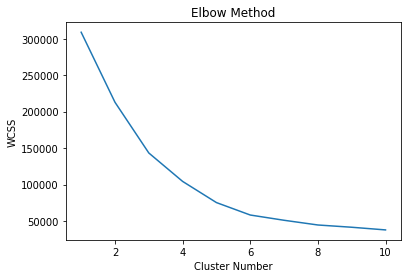

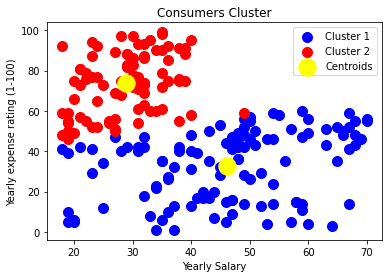

In [15]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print ("WCSS Value: ", wcss)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

In [8]:
data = pd.DataFrame(dataset, columns =['Usia', 'Rating_belanja (1-100)', 'Pendapatan (juta Rp)'])
data["Clusters"] = y_kmeans

data.to_csv('DataDalamKlaster.csv', index=False)

data.head()

,Usia,Rating_belanja (1-100),Pendapatan (juta Rp),Clusters
0,23,87,29,1
1,60,4,30,0
2,21,73,30,1
3,53,4,33,0
4,18,92,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    115
1     85
Name: Clusters, dtype: int64

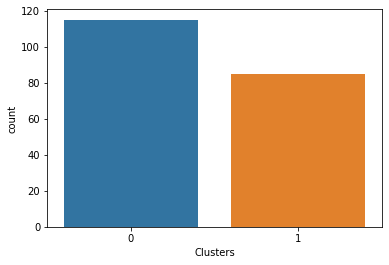

In [9]:
import seaborn as sns
sns.countplot(data["Clusters"])
data['Clusters'].value_counts()

Berdasarkan Elbow method, jumlah klaster terbaik yang terbentuk adalah 2 klaster. Kedua klaster ini berkelompok berdasarkan kemiripan berdasarkan Usia, Rating Belanja, dan Gaji. Kedua klaster tersebut memiliki penyebaran yang cukup terpisah dengan baik dan tidak banyak data yang bercampur antar klasternya.

Klaster pertama (0 - Biru) penyebarannya tidak cukup compact/ padat, yang menunjukkan kemiripan antar data tidak terlalu dekat, sedangkan Klaster kedua (1 - Merah) datanya berkumpul dengan cukup compact. Bila dilihat dari kelompok data yang terbentuk pada setiap klaster, hal yang menarik antara lain:

Klaster Pertama adalah kelompok pembeli yang memiliki usia rata-rata 46,2 tahun, sedangkan Klaster Kedua adalah pembeli dengan rata-rata usia pembeli adalah 28,9 tahun.
Klaster Pertama ternyata memiliki rating belanja yang tidak begitu tinggi, sekitar 32,9 rating belanjannya, hal ini juga selaras dengan rata-rata Pendapatan 59.4 Juta. Sedangkan, Klaster Kedua tingkat belanja pembeli cukup tinggi dengan rating belanja sekitar 73.62 dan rata-rata pendapatan yang lebih tinggi dibanding Klaster Pertama, yaitu 62.2 Juta.
Hasil klaster tersebut dapat menunjukkan bahwa target pasar yang paling menjanjikan adalah generasi sekitar usia kurang lebih 29 tahun. Dalam hal ini, pihak Departement Store menyediakan produk-produk dan promo-promo yang sesuai dan disukai oleh pembeli pada usia tersebut. Kemudian, Departement Store perlu menyediakan produk, promo, maupun fasilitas untuk meningkatkan rating belanja bagi pembeli yang berusia sekitar 46 tahun.
Hasil klaster ini juga dapat menunjukkan tingkat kebutuhan atau gaya hidup (belanja) dari para pembeli. Terlihat bahwa semakin matang usia semakin berbelanja sesuai kebutuhan (tidak terlalu banyak belanja) dibandingkan yang usianya relatif masih muda. Dari sisi pendapatan pun, lebih tinggi pada usia-usia yang lebih produktif.

# Hierarchical Clustering

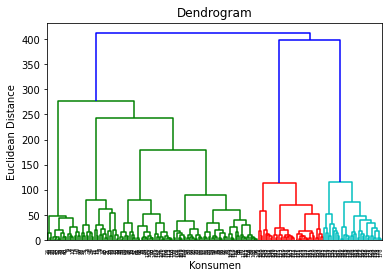

In [11]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Konsumen')
plt.ylabel('Euclidean Distance')
plt.show()


In [12]:
# Menjalankan Hierarchical Clustering ke dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


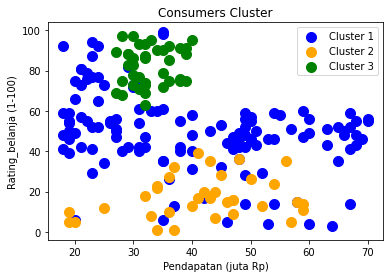

In [24]:
# Visualisasi hasil clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Consumers Cluster')
plt.xlabel('Pendapatan (juta Rp)')
plt.ylabel('Rating_belanja (1-100)')
plt.legend()
plt.show()

In [22]:
data2 = pd.DataFrame(dataset, columns =['Usia', 'Rating_belanja (1-100)', 'Pendapatan (juta Rp)'])
data2["Clusters"] = y_hc

data2.to_csv('DataDalamKlaster2.csv', index=False)

data2.head()

,Usia,Rating_belanja (1-100),Pendapatan (juta Rp),Clusters
0,23,87,29,0
1,60,4,30,0
2,21,73,30,0
3,53,4,33,0
4,18,92,33,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    126
2     39
1     35
Name: Clusters, dtype: int64

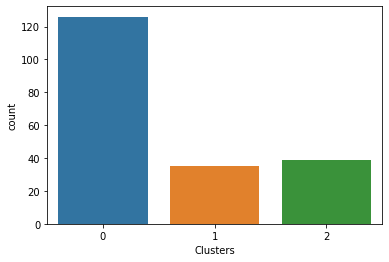

In [29]:
import seaborn as sns
sns.countplot(data2["Clusters"])
data2['Clusters'].value_counts()

Klaster yang terbentuk menggunakan Hierarchical Clustering adalah 3 buah Klaster, antara lain Klaster Pertama (0 - Merah), Klaster Kedua (1 - Biru), dan Klaster Ketiga (2 - Hijau). Banyak anggota klaster kedua yang serupa dengan klaster pertama. Klaster yang cukup padat berkumpul dengan baik adalah Klaster ketiga dibandingkan kedua klaster lainnya. Bila dilihat dari isi data pada setiap klaster, terdapat beberapa hal yang menarik, antara lain:

Klaster Ketiga adalah Klaster dengan kelompok konsumen yang memiliki rating belanja paling tinggi dengan rata-rata 82,13, sedangkan Klaster Pertama memiliki rating belanja rata-rata 49,5 dan Klaster Kedua adalah klaster yang paling kecil rating belanjanya yaitu sekitar 17,3.
Namun, yang menarik adalah Klaster Kedua memiliki pendapatan rata-rata paling tinggi dibandingkan dua klaster lainnya, yaitu 88,23 juta, tetapi rating belanjanya paling rendah. Sedangkan Klaster pertama pendapatan rata-ratanya sekitar 44,83 dan Klaster ketiga memiliki pendapatan rata-rata 86,54 juta. Klaster ketiga cukup masuk akal dengan pendapatan yang cukup tinggi dan rating belanja yang tinggi pula. Namun, yang perlu dipertimbangkan disini adalah pada klaster kedua, apakah ada kemungkinan kebutuhan konsumen yang pendapatannya cukup tinggi tidak terpenuhi di Department Store tersebut? Karena tingkat belanjanya sangat rendah. Karena itu perlu ada strategi-strategi khusus untuk tipe konsumen yang seperti ini.

# DBSCAN

https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html

https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/


## Spherical

750 spherical training data points with corresponding labels. After that standardize the features of your training data and at last, apply DBSCAN from the sklearn library.

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


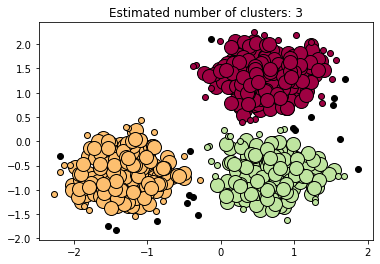

In [35]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## non-spherical

Number of clusters: 2
Homogeneity: 1.0
Completeness: 0.9591493437463376
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: -0.099


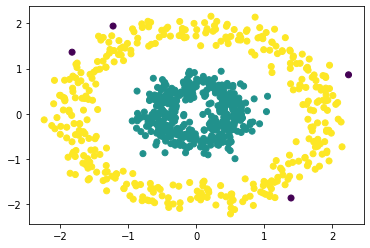

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))